# Vision Language Models (VLMs)

## LLaVA: Large Language and Vision Assistant

In [1]:
from transformers import LlavaNextProcessor, LlavaNextForConditionalGeneration
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
processor = LlavaNextProcessor.from_pretrained("llava-hf/llava-v1.6-mistral-7b-hf")
model = LlavaNextForConditionalGeneration.from_pretrained(
    "llava-hf/llava-v1.6-mistral-7b-hf",
    torch_dtype=torch.float16,
    low_cpu_mem_usage=True
)
model.to(device)


2025-04-01 09:43:23.520025: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-01 09:43:23.523136: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-04-01 09:43:23.523146: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=Fa

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

LlavaNextForConditionalGeneration(
  (vision_tower): CLIPVisionModel(
    (vision_model): CLIPVisionTransformer(
      (embeddings): CLIPVisionEmbeddings(
        (patch_embedding): Conv2d(3, 1024, kernel_size=(14, 14), stride=(14, 14), bias=False)
        (position_embedding): Embedding(577, 1024)
      )
      (pre_layrnorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (encoder): CLIPEncoder(
        (layers): ModuleList(
          (0-23): 24 x CLIPEncoderLayer(
            (self_attn): CLIPSdpaAttention(
              (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
            )
            (layer_norm1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
            (mlp): CLIPMLP(
              (activation_fn

## Visual Question Answering Datasets

### Domain: Radiology

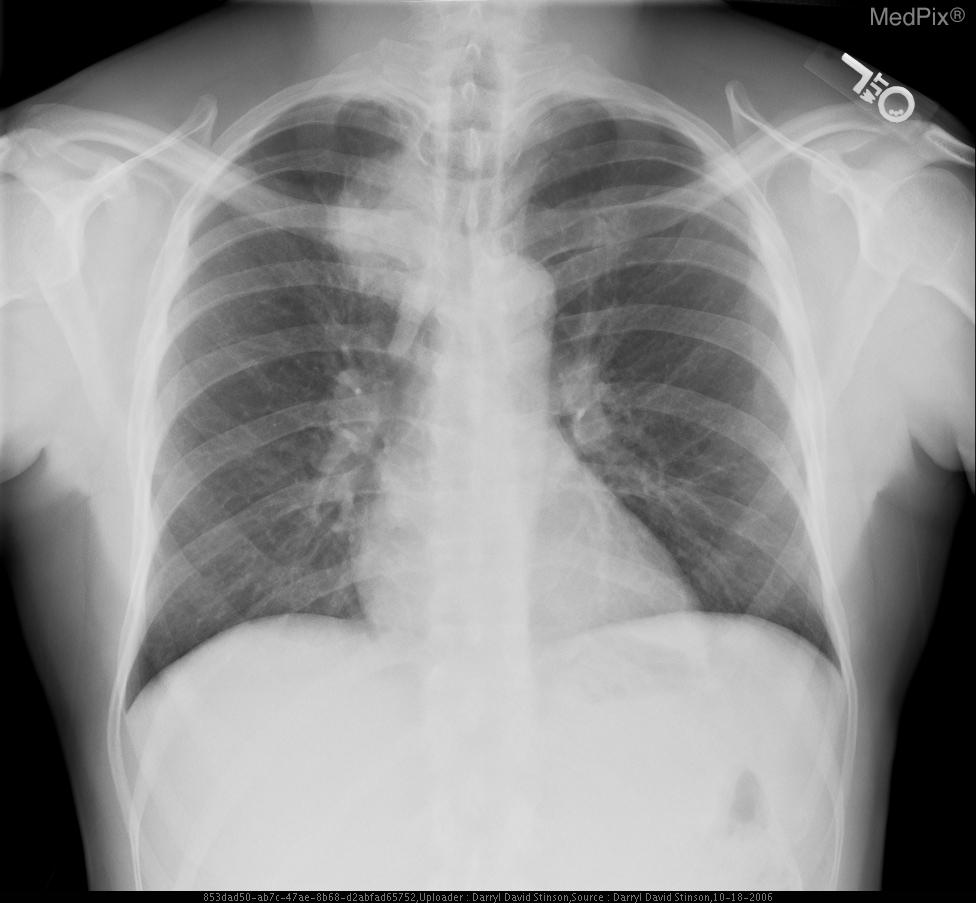

Image: synpic32081.jpg
Question: What is the location of the abnormality?
Answer: Right side of the trachea
Image Case URL: https://medpix.nlm.nih.gov/case?id=6383bee2-6323-4a9d-88dc-a5c97c7c1d98
Organ: CHEST
Evaluation: evaluated


In [18]:
import os
import random
from PIL import Image
import json
from collections import defaultdict


folder_path = 'VQA_RAD Image Folder'  

all_files = os.listdir(folder_path)

image_files = [f for f in all_files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]

# Randomly select an image file
random_image = random.choice(image_files)


image_path = os.path.join(folder_path, random_image)

# Open and display the randomly selected image
image = Image.open(image_path)
image.show()

# Load the JSON data
with open("VQA_RAD Dataset Public.json", "r") as file:
    data = json.load(file)

# Extract the base image name without extension
base_image_name = os.path.splitext(random_image)[0]

# Search for the image data in the JSON file
selected_entry = None
for entry in data:
    if entry["image_name"] == random_image:
        selected_entry = entry
        break

if selected_entry:
    print(f"Image: {random_image}")
    print(f"Question: {selected_entry['question']}")
    print(f"Answer: {selected_entry['answer']}")
    print(f"Image Case URL: {selected_entry['image_case_url']}")
    print(f"Organ: {selected_entry['image_organ']}")
    print(f"Evaluation: {selected_entry['evaluation']}")
else:
    print(f"No data found for image: {random_image}")


In [69]:
# prompt = "[INST] <image>\nWhat is shown in this image? Any diagnostic findings from the image?[/INST]"

# Prompt LLaVA model with the Question from the Dataset

In [19]:
prompt = f"[INST] <image>\n{selected_entry['question']}[\INST]"

# Calling LLaVA Model

In [20]:
inputs = processor(prompt, image, return_tensors="pt").to(device)

In [21]:
output = model.generate(**inputs, max_new_tokens=500)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


# Response/Output from LLaVA Model

In [22]:
# Decode and print the output
print(processor.decode(output[0], skip_special_tokens=True))

[INST]  
What is the location of the abnormality?[\INST] The image you've provided appears to be an X-ray of a human chest. The abnormality is located in the lower lobe of the right lung. It looks like a small, rounded opacity, which could be a nodule or a small mass. However, without additional context or a medical professional's assessment, it's not possible to definitively diagnose the abnormality. If this is a concern, it's important to consult with a healthcare provider for a proper evaluation. 


# Actual Ground Truth

In [23]:
print(f"Actual Question: {selected_entry['question']}\n")
print(f"Ground Truth Answer: {selected_entry['answer']}")

Actual Question: What is the location of the abnormality?

Ground Truth Answer: Right side of the trachea


# Visualize Image

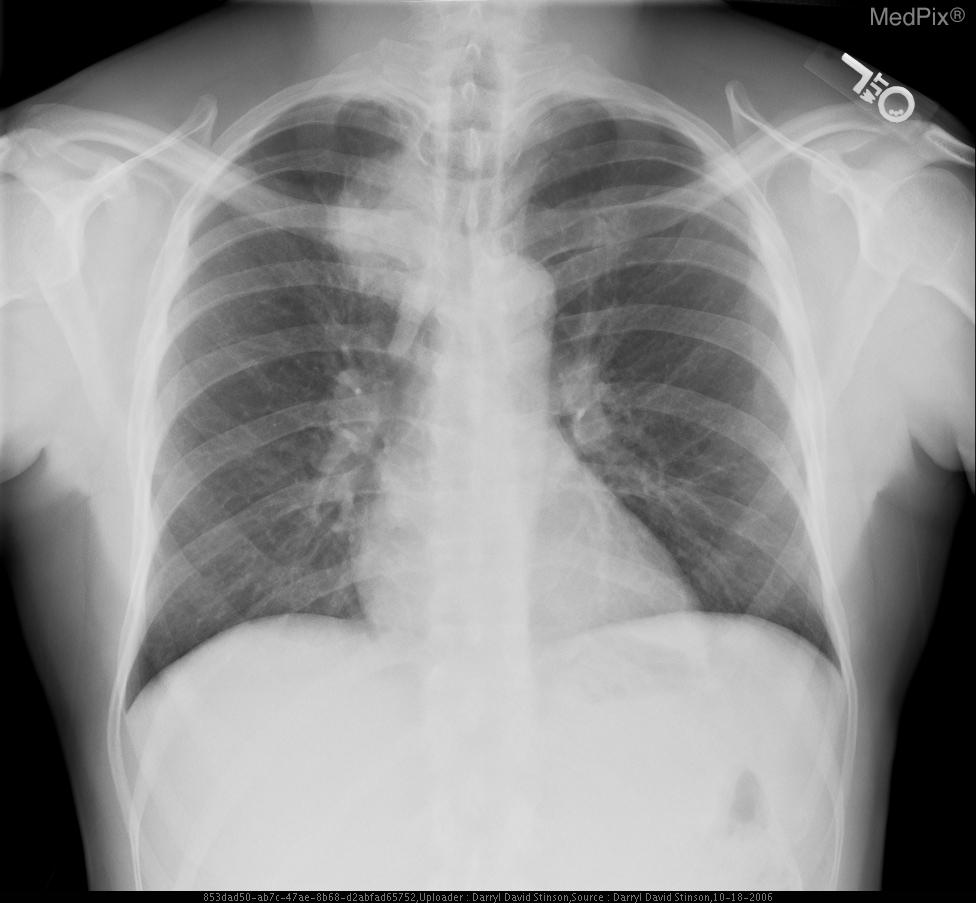

In [24]:
image.show()

## Library Installation

In [ ]:
pip install git+https://github.com/huggingface/transformers accelerate
!pip install transformers
pip install git+https://github.com/huggingface/accelerate
!pip install accelerate>=0.26.0
!pip install --upgrade accelerate